# Create  Synthetic Dataset

In this notebook, we create a synthetic dataset to train generative models with.

The notebook is split in two parts:
- 1) **TimeSeries Dataset** Generation of a gwpy TimeSeries dataset making use of random noise and sinusoidal functions
- 2) **Q-plot Dataset** Conversion of TimeSeries dataset into 2D Image dataset making use of q_transform

The dataset used to train the NN with is created as 2D images. The dataset is saved as a pickle for later use

### Run imports and define useful functions

In [1]:
%run ./import.ipynb

In [2]:
%run ./utils.ipynb

## TimeSeries Dataset

First we generate:

- data in the auxiliary channels -> these are control channels of the interferometer, which do not contain the physical signal
- data in the strain channel (main) -> this contains the physical GW signal

The strain channel contains a linear combination of the aux channels plus random noise


In [3]:
#Generate the dataframe with the aux channels
nb_events = 50000
nb_aux_channels = 2
noise = 0.5

df_aux_ts=generate_dataset_aux_channels(nb_events, nb_aux_channels, duration=16, sample_rate=500, 
                                        num_waves_range=(10, 15), noise_amplitude=noise)

In [4]:
#Generate the dataframe with the strain channel
noise=0.2
df_main_ts=generate_dataset_main_channel(df_aux_ts, weights=None, noise_amplitude=noise)

[1.02656597 1.49201673]


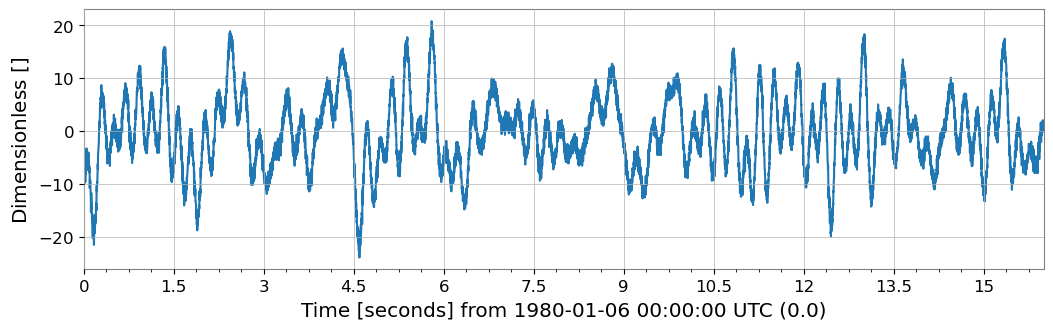

In [5]:
#plot the strain channel
df_main_ts.iloc[0,0].plot()
plt.show()

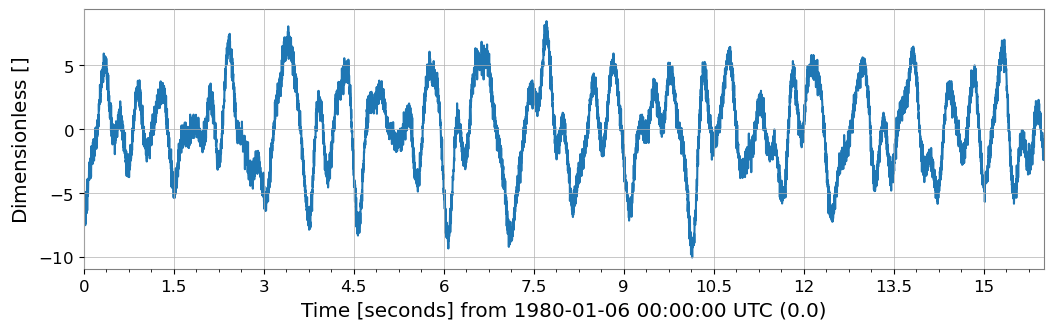

In [6]:
#plot the aux channel
df_aux_ts.iloc[0,0].plot()
plt.show()

## Q-plot dataset

Here we create a dataframe with images containing q-plots

In [7]:
# merge strain and aux channel dataframes
df_ts = pd.concat([df_main_ts, df_aux_ts], axis=1)

size = 64 # image size

### Monitor the execution of the following cell with "top"

- check cpu with cpuls in terminal
- multi-process module python -> check function in utils.py
- change number of processes and monitor execution time
- change number of processes from 1 to 80, can see different load with top, but execution time always the same, about 5 minutes, for 1000 time series. Hits top of memory? try to change limits in config.yaml

In [ ]:
#generate q-plot for each time series and make a square image 
num_processes=10 # nb processes spawned

s=time.time() # start clock
df=generate_cut_image_dataset(df_ts,list(df_ts.columns),num_processes,square_size=size)
e=time.time() # stop clock

print(e-s) # measure time

In [ ]:
# show first n events
nb_events = 5
zmax = 25
show_dataset(df,size,zmax,nb_events)

In [ ]:
#save dataset
#save_name='Image_dataset_synthetic_64x64.pkl'
save_name='/data/datasets/intertwin_synt/image_'+str(nb_aux_channels)+'aux_50k.pkl'

df.to_pickle(save_name)